In [1]:
import os
os.environ['autocnet_config'] = '/home/jlaura/autocnet_projects/demo.yml'
from autocnet_server.graph.graph import NetworkCandidateGraph
%pylab inline

Populating the interactive namespace from numpy and matplotlib


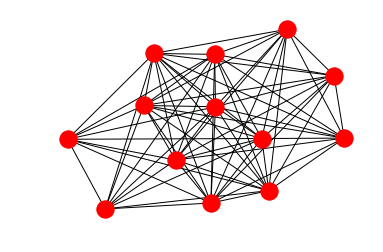

In [2]:
ncg = NetworkCandidateGraph.from_database()
ncg.plot()

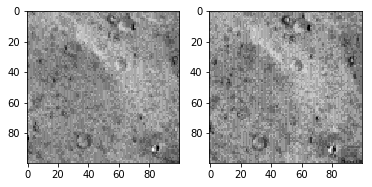

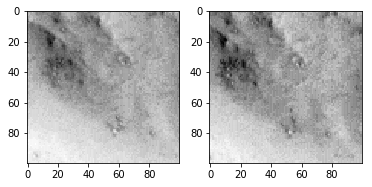

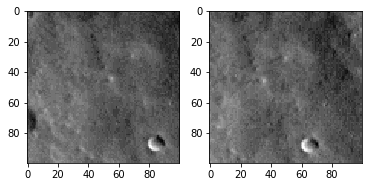

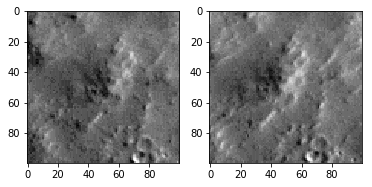

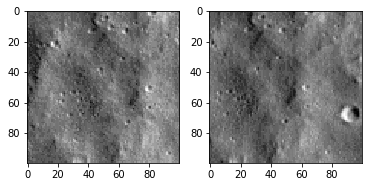

In [3]:
s = 3
d = 4

def apply_plot(r, a, b):
    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.imshow(a[int(r.source_y-50):int(r.source_y+50),int(r.source_x-50):int(r.source_x+50)], cmap='Greys')
    ax2.imshow(b[int(r.destination_y-50):int(r.destination_y+50),int(r.destination_x-50):int(r.destination_x+50)], cmap='Greys')
    return fig

e = ncg.edges[(s,d)]['data']
a = ncg.node[s]['data'].geodata.read_array()
b = ncg.node[d]['data'].geodata.read_array()
figs = e.matches.head(5).apply(apply_plot, args=(a,b), axis=1)
figs = None

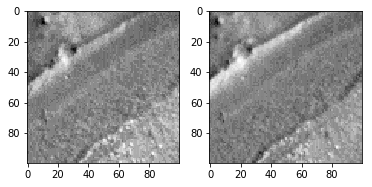

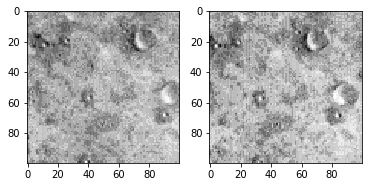

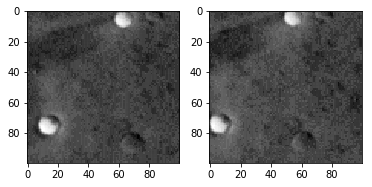

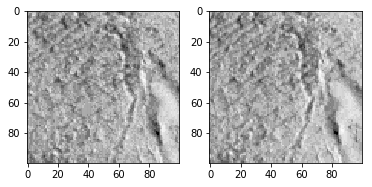

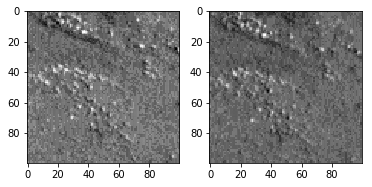

In [4]:
figs = e.matches.tail(5).apply(apply_plot, args=(a,b), axis=1)
